######### SNAPSHOT  run732HF.01360  #########
######### PARAMETER FILE  /home/ubuntu/projects/S2B/models/run732HF/run732HF.param  #########
* Loading data from file /home/ubuntu/projects/S2B/models/run732HF/run732HF.01360 ...
* Centering the data...
* Aligning the data...
* Short Bar, using 1 kpc
* Realigning bar using |z| < 0.25 
* Bar realigned by 143.23 degrees
######### Face-on bar ellipticity per age group. #########
*** Age group 1 ellipticity: 0.33
*** Age group 2 ellipticity: 0.33
*** Age group 3 ellipticity: 0.13
######### SNAPSHOT  run732HF.01370  #########
######### PARAMETER FILE  /home/ubuntu/projects/S2B/models/run732HF/run732HF.param  #########
* Loading data from file /home/ubuntu/projects/S2B/models/run732HF/run732HF.01370 ...
* Centering the data...
* Aligning the data...
* Short Bar, using 1 kpc
* Realigning bar using |z| < 0.25 
* Bar realigned by -136.72 degrees
######### Face-on bar ellipticity per age group. #########
*** Age group 1 ellipticity: 0.34
*** Age gro

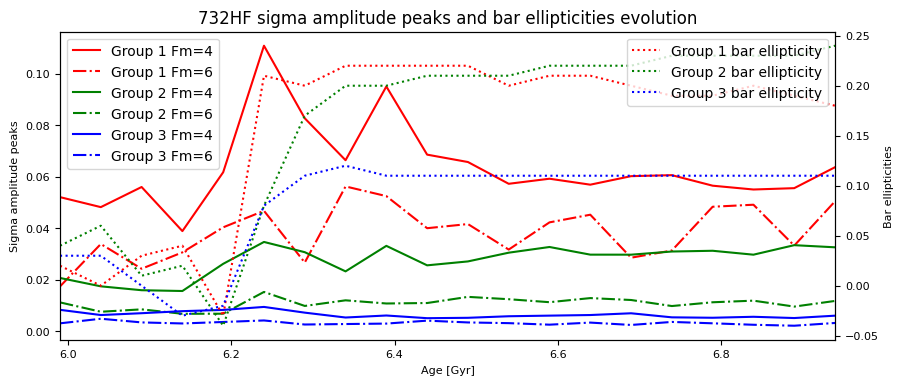

In [1]:
"""

This code calculates and plots the features of Pynbody models, focusing on the bar shape face-on and sigma shape edge-on per age group
- Face-on number density
- Face-on bar ellipticity
- Face-on bar length aproximation using Fourier moment 2
- Edge-on number density and sigma
- Edge-on sigma shape aproximation using Fourier moments 4 andf 6

"""

import pynbody as pb
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import scipy.stats as stats
import sys
from scipy.signal import find_peaks
import matplotlib.cm as cm

import my_functions as mf

# Working directories
model = 'run732HF'
base_dir = '/home/ubuntu/projects/S2B/'
model_dir = base_dir + "models/" + model + "/"
bar_image_dir = base_dir + "images/bar-shapes/" + model + "/"
sigma_image_dir = base_dir + "images/sigma-shapes/" + model + "/"

# Control switches
# True if we take a single snapshot from the model directohry
load_data = True
#load_data = False

manual_snap = True
#manual_snap = False

# True if the nuclear bar is considered
ncl_bar = True

# Align the bar during the data load
bar_align = True

# Tutn ON and OFF logging in functions
log = True
#log = False

# print out datasets and metadata
verbose_log = True
verbose_log = False

# Tutn ON and OFF show plotting in functions
show_plot = True
#show_plot = False

# save plots to the inage_dir folder
save_file = True
#save_file = False

# Plot face-on number density after manipulation with the dataset
verbose_bar_plot = True    
verbose_bar_plot = False

# Plot face-on number density per age group
plot_density_face_on = True  
plot_density_face_on = False

# Plot bar Amp/Phase per age group
plot_bar_amplitude = True   
plot_bar_amplitude = False

# Plot ellipticity per radius for bar fase-on, aligned to X-axis
plot_bar_ellipticity = True 
#plot_bar_ellipticity = False

# Plot bar end-on LOS sigma per age group
plot_LOS_sigma = True
plot_LOS_sigma = False

# Plot bar end-on LOS sigma combined Fourier m 4 and 6per age group
plot_LOS_sigma_combined = True       
plot_LOS_sigma_combined = False

# Plot LOS sigma Amp/Phase per Fourier moment per age group
plot_sigma_single_mplitude = True 
plot_sigma_single_amplitude = False

# Plot LOS sigma Amplitude with combined Fourier moment 4 and 6 per age group
plot_sigma_combined_amplitude = True 
plot_sigma_combined_amplitude = False

# Plot LOS sigma Amplitude and ellipticity timeline with combined Fourier moment 4 and 6 per age group
plot_sigma_amplitude_ellipticity_timeline = True
#plot_sigma_amplitude_ellipticity_timeline = False

plot_bar_ellipticity_timeline = True
#plot_bar_ellipticity_timeline = False

bin_width = 0.1 # kpc - for Amp/Phase calculations
bin_arc = 10 # degrees
bins = 200 # for 2D statistic calculations
xlim, ylim = 1., 1. # kpc

mass_fact = 1

barFm = 2 # Fourier moment for bar
sigmaFm = [4,6] # Fourier moment for sigma

aF_peaks = []
e_list = []
snap_ages = []

if manual_snap:
    #fnames = ['run732HF.01200','run732HF.01210','run732HF.01220','run732HF.01230','run732HF.01240','run732HF.01250']
    #fnames = ['run732HF.01260','run732HF.01270','run732HF.01280','run732HF.01290','run732HF.01300','run732HF.01310']
    #fnames = ['run732HF.01320','run732HF.01330','run732HF.01340','run732HF.01350']
    fnames = ['run732HF.01360','run732HF.01370','run732HF.01380','run732HF.01390']
else:
    fnames , params = mf.list_snaps(model_dir,verbose_log)

for fname in fnames:
    
    if load_data:
        file = model_dir + fname
        paramfile = model_dir + model + '.param'

        print("######### SNAPSHOT ", fname, " #########")
        print("######### PARAMETER FILE ", paramfile, " #########")

        sn = mf.pbload(file, paramfile, ncl_bar, bar_align, log, verbose_log)

        sn.physical_units()

    if verbose_bar_plot:
        print("######### Face-on number dencity for the whole model. #########")
        # Extract NP arrays and mask central area xlim by ylim
        x,y,z,m,age,tf = mf.extract_np(sn)
        x,y,z,m,age,tf = mf.mask_np(x,y,z,m,age,tf,xlim,ylim)

        # Sanity check plot
        # mf.plot_density_hist2d(x,y) # The Stuart's way
        mf.plot_density(x,y,z,xlim,ylim,bins,fname,bar_image_dir,save_file,show_plot)
    
    ###
    # Plot number densities by age group  
    ###

    if plot_density_face_on:
         print("######### Face-on number dencity per age group. #########")
         pos = "_face_on"
         mf.plot_density_by_age(sn,pos,xlim,ylim,bins,fname,bar_image_dir,save_file,show_plot,verbose_log)
         
    ###
    # Bar ellipticity calculation and plotting
    ###

    if plot_bar_ellipticity:
        print("######### Face-on bar ellipticity per age group. #########")
        e_list_sn =  mf.bar_ellipticity_by_age(sn,xlim,ylim,bins,fname,bar_image_dir,save_file,show_plot,verbose_log)
        e_list.append(e_list_sn)

    ###
    # Bar length calculation and plotting
    ###

    if plot_bar_amplitude:
        print("######### Face-on bar amplitude per age group. #########")
        mf.bar_length_by_age_Fm(sn,bin_width,xlim,barFm,fname,bar_image_dir,save_file,show_plot,verbose_log)

    ###
    # Calculate and plot LOS velocity dispersion (sigla_LOS)
    ###

    if plot_LOS_sigma:

        # Rotating the data - bar aligned to Y-axis
        angle = -90

        if verbose_log:
            print('* Rotating the data in X-Y to', angle, "deg.")
        sn.rotate_z(angle)

        # Rotating the data - galactic plane edge-on -> bar end-on
        angle = -90

        if verbose_log:
            print('* Rotating the data in Y-Z to', angle, "deg.")
        sn.rotate_x(angle)

        # Plot number densities by age group
        print("######### Edge-on number dencity per age group. #########")
        pos = "_end_on"
        mf.plot_density_by_age(sn,pos,xlim,ylim,bins,fname,bar_image_dir,save_file,show_plot,verbose_log)

        # Calculate and plot LOS velocity dispertion by age group
        print("######### Edge-on sigma per age group. #########")
        mf.plot_sigma_by_age(sn,xlim,ylim,bins,fname,sigma_image_dir,save_file,show_plot,verbose_log)

    if plot_sigma_single_amplitude:
        for Fm in sigmaFm:
            print("######### Edge-on sigma amplitude per age group. #########")
            print("######### Fourier moment", Fm)
            mf.sigma_shape_by_age_Fm(sn,bin_width,bin_arc,xlim,Fm,fname,sigma_image_dir,save_file,show_plot,verbose_log)

    if plot_LOS_sigma_combined:

        # Rotating the data - bar aligned to Y-axis
        angle = -90

        if verbose_log:
            print('* Rotating the data in X-Y to', angle, "deg.")
        sn.rotate_z(angle)

        # Plot number densities by age group
        print("######### Face-on number dencity per age group. #########")
        pos = "_face_on_90"
        mf.plot_density_by_age(sn,pos,xlim,ylim,bins,fname,bar_image_dir,save_file,show_plot,verbose_log)

        # Rotating the data - galactic plane edge-on -> bar end-on
        angle = -90

        if verbose_log:
            print('* Rotating the data in Y-Z to', angle, "deg.")
        sn.rotate_x(angle)

        # Calculate and plot LOS velocity dispertion by age group
        print("######### Edge-on sigma distribution per age group. #########")
        mf.plot_sigma_by_age(sn,xlim,ylim,bins,fname,sigma_image_dir,save_file,show_plot,verbose_log)

        # Calculate and plot sigma amplitude by age group, Fourier moments 4 and 6
        print("######### Edge-on sigma amplitude per age group. #########")
        print("######### combined Fourier moments", sigmaFm[0], sigmaFm[1])
        aF_peaks_sn, snap_age = mf.sigma_shape_by_age_combined_Fm(sn,bin_width,bin_arc,xlim,sigmaFm,fname,sigma_image_dir,save_file,show_plot,verbose_log)

        aF_peaks.append(aF_peaks_sn)
        snap_ages.append(snap_age)

    if load_data:
        # Delete the dataset from the memory once done
        del sn


if plot_sigma_amplitude_ellipticity_timeline:

    # Datasets for bin = 30
    aF_peaks = [[[0.05203983665258428, 0.01736198875867254], [0.02063785802461037, 0.01115171161532417], [0.008257953282583901, 0.003017661268743144]], [[0.0481584345108983, 0.03383582231681453], [0.017388275090851002, 0.007515810147159208], [0.00623866983663874, 0.004797357183087563]], [[0.0559775134815109, 0.024218988369874968], [0.015878564227284123, 0.00844612979120427], [0.006950132699656048, 0.0033738272238326267]], [[0.03884818664681085, 0.030585751923634198], [0.015574251015208047, 0.006723664088211857], [0.00774571347015846, 0.002964609713880013]], [[0.06170974976499347, 0.04030974176114399], [0.02613404885037847, 0.0067560281219429036], [0.008226914465947864, 0.003538044402527504]], [[0.1108623097908376, 0.04672848471191356], [0.034631582431522805, 0.015210859800131728], [0.009389040530947596, 0.0041305420636940276]], [[0.08267550626424508, 0.026625728752537846], [0.030653050587204758, 0.00977449084624928], [0.007167137099336486, 0.0025573261442188118]], [[0.06638005929844386, 0.05619858866154252], [0.023202820554087445, 0.011955511905818837], [0.005276516160793406, 0.002741367776818967]], [[0.09503047266985339, 0.052435793196591], [0.033112820438030655, 0.010724157430981162], [0.0060584640885447336, 0.00291670248512861]], [[0.06855035747037244, 0.03997291783567501], [0.02554674477287103, 0.010905054163156984], [0.005015320921141888, 0.004058027444178632]], [[0.0656835681271622, 0.041580159244513595], [0.027066312443614068, 0.013294990647597338], [0.00516319618782835, 0.003362105466132848]], [[0.057224913423948406, 0.03167419738927574], [0.0304606783277795, 0.012386833087604621], [0.00576853895167448, 0.003089631872260613]], [[0.05919532496625479, 0.04224113908602751], [0.03267247088713989, 0.011227102188397895], [0.006007285105371201, 0.0024953445410777707]], [[0.05688047251364577, 0.045210627286857694], [0.02970103364664786, 0.01282016302235514], [0.006241804892171005, 0.0033031914210817485]], [[0.06019033859453161, 0.02851448292618206], [0.029686677212772763, 0.012081561480265412], [0.006921305307257074, 0.0023838648718594313]], [[0.060580168797346116, 0.031297921202354126], [0.030915052802679387, 0.009734594182152669], [0.005344032399495442, 0.0035610643433391744]], [[0.056485825222303554, 0.04830860571086459], [0.03120475329160512, 0.011199323752274419], [0.005182928617688868, 0.0030248038049268764]], [[0.05500348791446745, 0.04909262900556201], [0.02968589617540713, 0.011825965526899254], [0.005560897052963284, 0.002459108624294608]], [[0.05552781229205744, 0.03320375618168233], [0.03337819877068259, 0.00951950756315067], [0.005072115782095357, 0.0020873742815874]], [[0.06366656490385329, 0.0504177289428985], [0.03255140455646429, 0.011717615620532813], [0.005989488051310522, 0.00315449375455052]]]
    snap_ages = [5.99, 6.04, 6.09, 6.14, 6.19, 6.24, 6.29, 6.34, 6.39, 6.44, 6.49, 6.54, 6.59, 6.64, 6.69, 6.74, 6.79, 6.84, 6.89, 6.94]
    e_list = [[0.02, 0.04, 0.03], [0.0, 0.06, 0.03], [0.03, 0.01, 0.0], [0.04, 0.02, -0.03], [-0.03, -0.04, -0.02], [0.21, 0.08, 0.08], [0.2, 0.17, 0.11], [0.22, 0.2, 0.12], [0.22, 0.2, 0.11], [0.22, 0.21, 0.11], [0.22, 0.21, 0.11], [0.2, 0.21, 0.11], [0.21, 0.22, 0.11], [0.21, 0.22, 0.11], [0.2, 0.22, 0.11], [0.19, 0.23, 0.11], [0.19, 0.23, 0.11], [0.2, 0.23, 0.11], [0.19, 0.23, 0.11], [0.18, 0.24, 0.11]]

    print(aF_peaks)
    print(snap_ages)
    print(e_list)

    mf.plot_sigma_amp_bar_ellip_timeline(model,aF_peaks,e_list,snap_ages,plot_bar_ellipticity_timeline,sigma_image_dir,save_file=True,show_plot=True,verbose_log=False)

